In [2]:
import os
import shutil
import joblib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, MobileNetV2
# from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping


In [37]:
source = 'dataset/'
all_files = os.listdir(source)

for class_name in all_files:
    files = os.listdir(os.path.join(source, class_name))
    print (f"{class_name} : {len(files)} images")

batik-cendrawasih : 146 images
batik-dayak : 115 images
batik-kawung : 152 images
batik-lasem : 154 images
batik-megamendung : 118 images
batik-parang : 166 images
batik-pring-sedapur : 157 images
batik-sekar : 107 images
batik-tambal : 122 images
batik-tuntrum : 110 images


In [38]:
source = 'dataset/'

train_dir = 'dataset_split/train'
val_dir = 'dataset_split/val'

val_split = 0.2

all_files = os.listdir(source)

for class_name in all_files:
    os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

    files = os.listdir(os.path.join(source, class_name))
    train_files, val_files = train_test_split(files, test_size=val_split, random_state=50)

    for file in train_files:
        source_path = os.path.join(source, class_name, file)
        des_path = os.path.join(train_dir, class_name, file)
    
        try:
            with Image.open(source_path) as img:
                img.verify()
                shutil.copy(source_path, des_path)   
        except (IOError, SyntaxError) as e:
            print(f"Unable to open {file}: {e}")
    
    for file in val_files:
        source_path = os.path.join(source, class_name, file)
        des_path = os.path.join(val_dir, class_name, file)
        try:
            with Image.open(source_path) as img:
                img.verify()
                shutil.copy(source_path, des_path)
    
        except (IOError, SyntaxError) as e:
            print(f"Unable to open {file}: {e}")


In [39]:
for file in all_files :
    img_path = os.path.join(train_dir, file)
    list = os.listdir(img_path);
    print(f"train {file}  : {len(list)} images")

for file in all_files :
    img_path = os.path.join(val_dir, file)
    list = os.listdir(img_path);
    print(f"validation {file} : {len(list)} images")

train batik-cendrawasih  : 116 images
train batik-dayak  : 92 images
train batik-kawung  : 121 images
train batik-lasem  : 123 images
train batik-megamendung  : 94 images
train batik-parang  : 132 images
train batik-pring-sedapur  : 125 images
train batik-sekar  : 85 images
train batik-tambal  : 97 images
train batik-tuntrum  : 88 images
validation batik-cendrawasih : 30 images
validation batik-dayak : 23 images
validation batik-kawung : 31 images
validation batik-lasem : 31 images
validation batik-megamendung : 24 images
validation batik-parang : 34 images
validation batik-pring-sedapur : 32 images
validation batik-sekar : 22 images
validation batik-tambal : 25 images
validation batik-tuntrum : 22 images


In [40]:
img_width = 224;
img_height = 224;

In [41]:

train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_datagen.flow_from_directory(
    directory = train_dir,
    batch_size = 16,
    class_mode = 'categorical',
    target_size = (img_width,img_height)
)

val_datagen = ImageDataGenerator(
    rescale = 1/255.
)

val_gen = val_datagen.flow_from_directory(
    directory = val_dir,
    batch_size = 4,
    class_mode = 'categorical',
    target_size = (img_width,img_height)
)


Found 987 images belonging to 10 classes.
Found 258 images belonging to 10 classes.


In [6]:
# plt.figure(figsize=(10, 10))
# for images, labels in train_datagen.take(1):
#   for i in range(7):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [7]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(16, (3,3), padding = 'same', activation='relu', input_shape=(img_width,img_height,3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(32, (3,3), padding = 'same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64, (3,3), padding = 'same', activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(7, activation='softmax')
# ])

# model.compile(optimizer=tf.keras.optimizers.Adam(),
#             loss=tf.keras.losses.categorical_crossentropy,
#             metrics=['accuracy'])

# model.summary();


In [8]:
# history = model.fit(
#     train_gen,
#     epochs = 100,
#     verbose = 1,
#     validation_data = val_gen
# )

In [9]:
# history = history.history
# plt.plot(history['accuracy'])
# plt.plot(history['val_accuracy'])
# plt.title('Model Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()


# plt.plot(history['loss'])
# plt.plot(history['val_loss'])
# plt.title('Model Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

In [10]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') > 0.9:
            print("\nVal akurasi mencapai lebih dari 90%, training dihentikan.")
            self.model.stop_training = True

In [11]:

base_model = MobileNetV2(input_shape = (img_width,img_height,3),
                     include_top = False,
                     weights = 'imagenet')    

for layer in base_model.layers:
    layer.trainable = False
x = tf.keras.layers.Conv2D(128, (3,3), padding = 'same', activation='relu')(base_model.output)
x = tf.keras.layers.MaxPooling2D(2,2)(x)
x = tf.keras.layers.Flatten()(x)
# x = tf.keras.layers.Dense(1024, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(512, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu', name='feature_extract_layer')(x)
x = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(base_model.input, x)

model.compile(optimizer=tf.keras.optimizers.RMSprop(),
            loss=tf.keras.losses.categorical_crossentropy,
            metrics=['accuracy'])

model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']      

In [12]:
callback = MyCallback()
# early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    train_gen,
    epochs = 100,
    verbose = 1,
    validation_data = val_gen,
    callbacks=[callback]
)

Epoch 1/100


62/62 [==============================] - 66s 960ms/step - loss: 2.5826 - accuracy: 0.2333 - val_loss: 1.3216 - val_accuracy: 0.5736
Epoch 2/100
62/62 [==============================] - 52s 840ms/step - loss: 1.5079 - accuracy: 0.5030 - val_loss: 1.1291 - val_accuracy: 0.6357
Epoch 3/100
62/62 [==============================] - 60s 963ms/step - loss: 1.1332 - accuracy: 0.6293 - val_loss: 0.7664 - val_accuracy: 0.7674
Epoch 4/100
62/62 [==============================] - 61s 974ms/step - loss: 0.9334 - accuracy: 0.7131 - val_loss: 0.7222 - val_accuracy: 0.7713
Epoch 5/100
62/62 [==============================] - 60s 962ms/step - loss: 0.8194 - accuracy: 0.7515 - val_loss: 0.7408 - val_accuracy: 0.7868
Epoch 6/100
62/62 [==============================] - 58s 925ms/step - loss: 0.7206 - accuracy: 0.7818 - val_loss: 0.7192 - val_accuracy: 0.8101
Epoch 7/100
62/62 [==============================] - 60s 976ms/step - loss: 0.6919 - accuracy: 0.8010 - val_loss: 0.6261 - val_accurac

In [14]:
model.save("model1.h5")

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


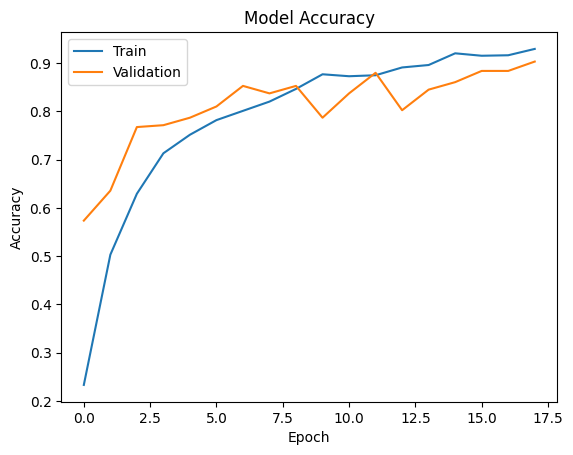

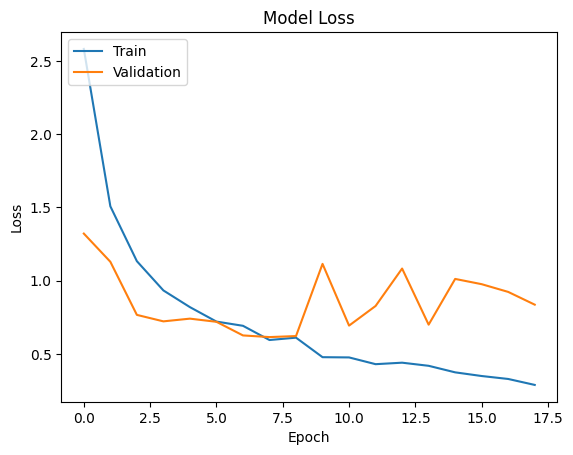

In [15]:
history = history.history
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])

plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [29]:
from tensorflow.keras.preprocessing import image

def load_and_process_image(image_path):
    img = image.load_img(image_path, target_size=(img_width,img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array
    
# feature_extractor = tf.keras.Model(inputs=model.input, outputs=model.get_layer('feature_extract_layer').output)


In [30]:
motif_batik_model = load_model('model.h5')
feature_extractor = tf.keras.Model(inputs=motif_batik_model.input, outputs=motif_batik_model.get_layer('feature_extract_layer').output)

In [26]:
recomendation_dir = 'rekomendasi'
list_image_path = [];
# imported_images = [];
list_motif = os.listdir(recomendation_dir)

for motif in list_motif:
    images = os.listdir(os.path.join(recomendation_dir, motif))
    # print(images)
    for image in images:
        image_path = os.path.join(motif, image)
        
        image_path = image_path.replace("\\", "/")
        list_image_path.append(image_path)
    
print(np.shape(list_image_path))
print(list_image_path)
    

(901,)
['batik-cendrawasih/batik-cendrawasih-1.jpg', 'batik-cendrawasih/batik-cendrawasih-10.jpg', 'batik-cendrawasih/batik-cendrawasih-11.jpg', 'batik-cendrawasih/batik-cendrawasih-12.jpg', 'batik-cendrawasih/batik-cendrawasih-13.jpg', 'batik-cendrawasih/batik-cendrawasih-14.jpg', 'batik-cendrawasih/batik-cendrawasih-15.jpg', 'batik-cendrawasih/batik-cendrawasih-16.jpg', 'batik-cendrawasih/batik-cendrawasih-17.jpg', 'batik-cendrawasih/batik-cendrawasih-18.jpg', 'batik-cendrawasih/batik-cendrawasih-19.jpg', 'batik-cendrawasih/batik-cendrawasih-2.jpg', 'batik-cendrawasih/batik-cendrawasih-20.jpg', 'batik-cendrawasih/batik-cendrawasih-21.jpg', 'batik-cendrawasih/batik-cendrawasih-22.jpg', 'batik-cendrawasih/batik-cendrawasih-23.jpg', 'batik-cendrawasih/batik-cendrawasih-24.jpg', 'batik-cendrawasih/batik-cendrawasih-25.jpg', 'batik-cendrawasih/batik-cendrawasih-26.jpg', 'batik-cendrawasih/batik-cendrawasih-27.jpg', 'batik-cendrawasih/batik-cendrawasih-28.jpg', 'batik-cendrawasih/batik-cen

In [42]:
imported_images = []

for image_path in list_image_path:
    image_path = os.path.join(recomendation_dir, image_path)
    imported_image = load_and_process_image(image_path)
    imported_images.append(imported_image)

In [43]:
list_images = np.vstack(imported_images)

images_features = feature_extractor.predict(list_images)
np.shape(images_features)

29/29 [==============================] - 20s 650ms/step


(901, 128)

In [58]:
# Simpan fitur gambar dan list path gambar menggunakan joblib
joblib.dump(images_features, 'image_features.joblib')
joblib.dump(list_image_path, 'image_paths.joblib')

['image_paths.joblib']

In [52]:
nb_closest_images = 5
def retrieve_most_similar_batik1(given_img_path):
    target_image = load_and_process_image(given_img_path)
    target_features = feature_extractor.predict(target_image)

    print("-----------------------------------------------------------------------")
    print(f"original image : {given_img_path}")
    original = image.load_img(given_img_path, target_size=(img_width,img_height))
    plt.imshow(original)
    plt.show()
    print("-----------------------------------------------------------------------")
    print("most similar products (cosine similarities):")
    similarities = cosine_similarity(target_features, images_features)
    target_image_index = 0
    recommended_images = np.argsort(similarities[target_image_index])[::-1][:nb_closest_images]
    for i in recommended_images:
        image_path = list_image_path[i];
        similarity_score = similarities[target_image_index][i]
        print(f"path : {image_path}")
        print(f"kemiripan : {similarity_score:.4f}")
        original = image.load_img(os.path.join(recomendation_dir, image_path), target_size=(img_width,img_height))
        plt.imshow(original)
        plt.show()

In [53]:
def retrieve_most_similar_batik2(given_img_path):
    target_image = load_and_process_image(given_img_path)
    target_features = feature_extractor.predict(target_image)

    print("-----------------------------------------------------------------------")
    print(f"original image : {given_img_path}")
    original = image.load_img(given_img_path, target_size=(img_width, img_height))
    plt.imshow(original)
    plt.show()
    print("-----------------------------------------------------------------------")
    print("most similar products (Euclidean distances):")
    distances = euclidean_distances(target_features, images_features)
    target_image_index = 0
    recommended_images = np.argsort(distances[target_image_index])[:nb_closest_images]  
    for i in recommended_images:
        image_path = list_image_path[i]
        distance_score = distances[target_image_index][i]
        print(f"path : {image_path}")
        print(f"kemiripan : {distance_score:.4f}")
        original = image.load_img(os.path.join(recomendation_dir, image_path), target_size=(img_width, img_height))
        plt.imshow(original)
        plt.show()

In [54]:
test_path = "test";
list_test_path = [];
list_test = os.listdir(test_path);
for i, test in enumerate(list_test):
    list_test_path.append(os.path.join(test_path, test));
    print(f"{i}  - {test}")
    

0  - 1.jfif
1  - 15197877316_f8cd4c7fa7_z.jpg
2  - Annotation 2023-11-29 155938.png
3  - Annotation 2023-11-29 160957.png
4  - Annotation 2023-11-29 195738.png
5  - Annotation 2023-11-30 174256.png
6  - Annotation 2023-11-30 174327.png
7  - Annotation 2023-11-30 174552.png
8  - Annotation 2023-12-05 212833.png
9  - Annotation 2023-12-06 002048.png
10  - Annotation 2023-12-06 002240.png
11  - Annotation 2023-12-06 100344.png
12  - Annotation 2023-12-06 121121.png
13  - Annotation 2023-12-06 121720.png
14  - batik.png
15  - Batik_Parang_Kusumo_Lengan_Pendek.jfif
16  - dress_batik_lasem_1565878624_59851052_progressive.jpg
17  - fitinlinecom.jpg
18  - idtheasianparentcom.jpg
19  - semarangposcom1.jpg


1/1 [==============================] - 0s 72ms/step
-----------------------------------------------------------------------
original image : test\Annotation 2023-11-29 155938.png


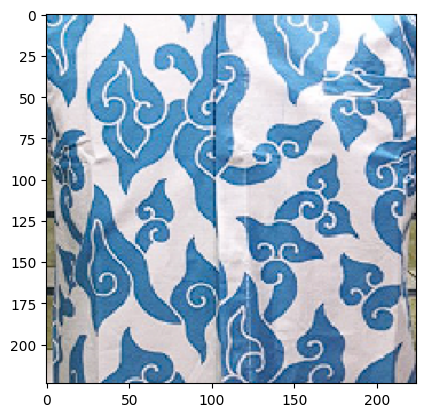

-----------------------------------------------------------------------
most similar products (cosine similarities):
path : batik-megamendung/batik-megamendung-42.jpg
kemiripan : 0.9886


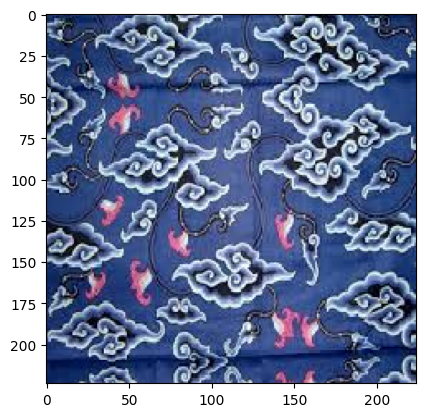

path : batik-megamendung/batik-megamendung-69.jpg
kemiripan : 0.9877


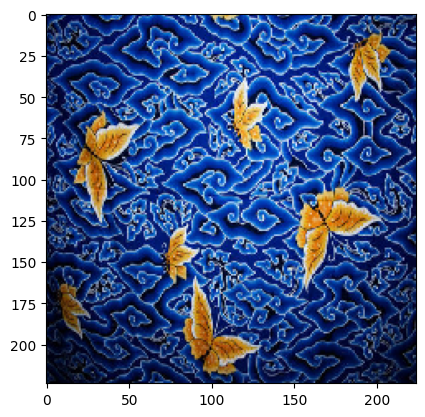

path : batik-megamendung/batik-megamendung-70.jpg
kemiripan : 0.9870


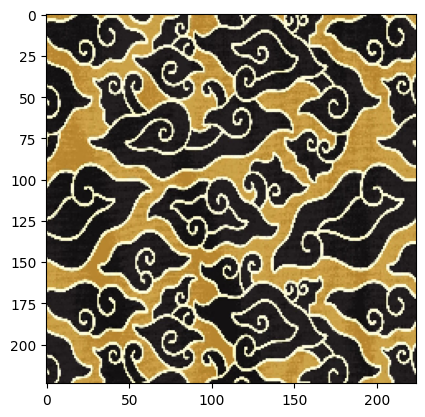

path : batik-megamendung/batik-megamendung-64.jpg
kemiripan : 0.9867


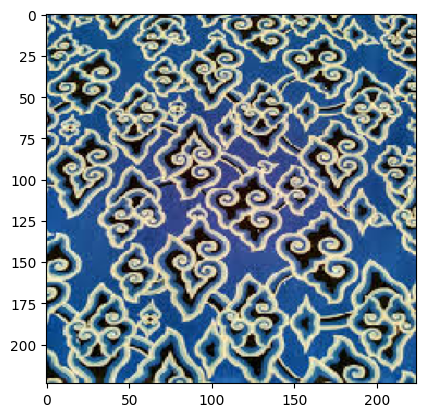

path : batik-megamendung/batik-megamendung-11.jpg
kemiripan : 0.9848


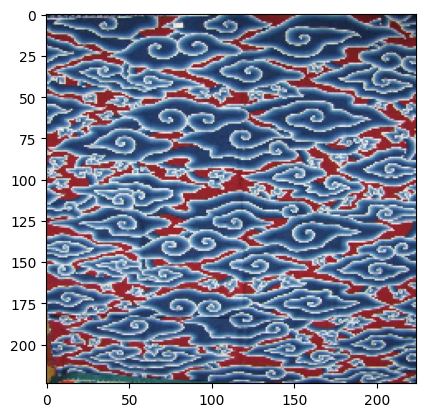

In [56]:
retrieve_most_similar_batik1(list_test_path[2])

1/1 [==============================] - 0s 72ms/step
-----------------------------------------------------------------------
original image : test\Annotation 2023-11-29 160957.png


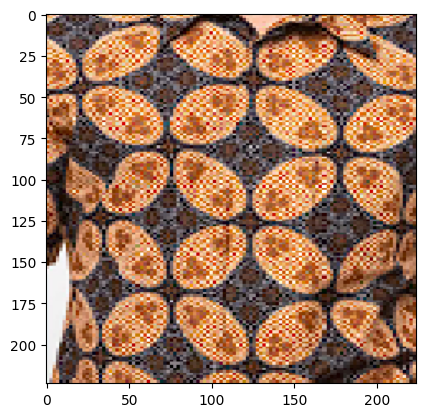

-----------------------------------------------------------------------
most similar products (Euclidean distances):
path : batik-kawung/batik-kawung-30.jpg
kemiripan : 5.2755


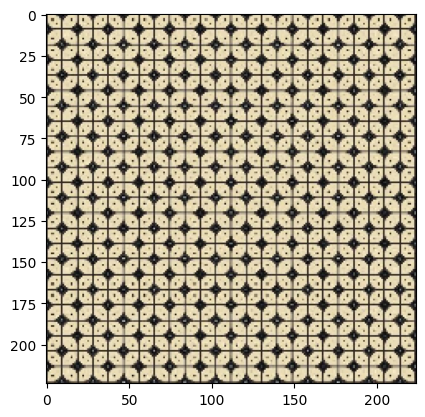

path : batik-kawung/batik-kawung-48.jpg
kemiripan : 6.9183


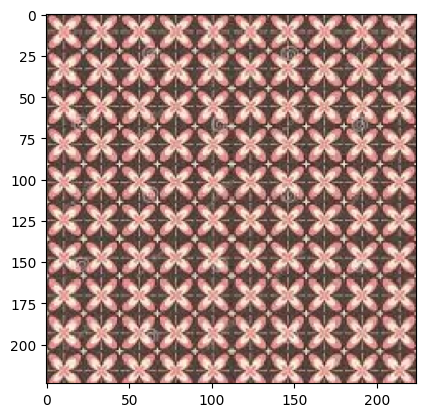

path : batik-kawung/batik-kawung-18.jpg
kemiripan : 7.2543


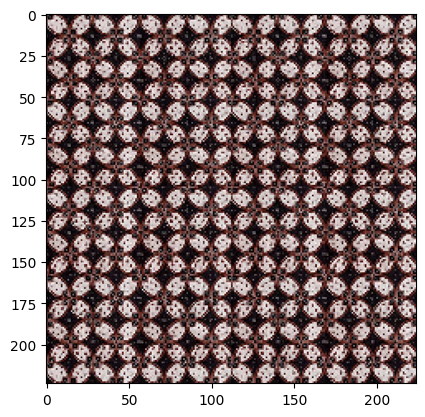

path : batik-kawung/batik-kawung-89.jpg
kemiripan : 7.4392


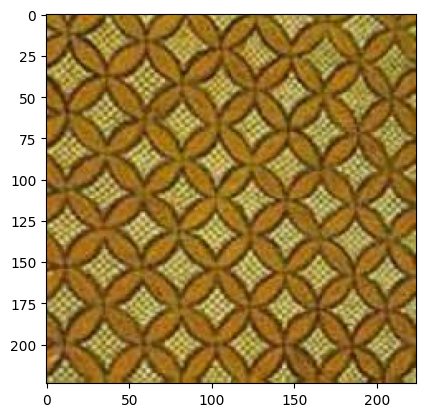

path : batik-kawung/batik-kawung-44.jpg
kemiripan : 7.5198


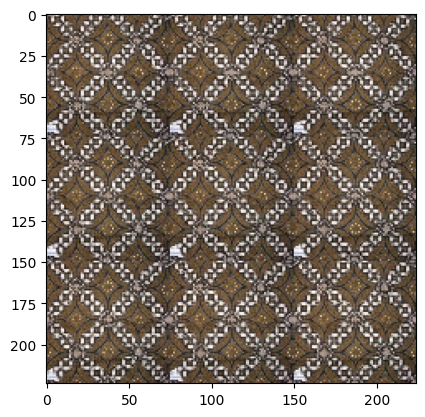

In [57]:
retrieve_most_similar_batik2(list_test_path[3])